In [7]:
pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 2.9 MB/s eta 0:00:0000:0100:02m
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1
Note: you may need to restart the kernel to use updated packages.


In [77]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.image import pad_to_bounding_box
from tensorflow.image import central_crop
from tensorflow.image import resize
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [78]:
# 데이터셋 경로
train_dir = '/Users/choiminji/Desktop/archive/images'  # 학습 데이터가 저장된 디렉토리 경로

In [79]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # 픽셀 값을 0~1 사이로 정규화
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [80]:
# 학습 데이터 불러오기
train_generator = train_datagen.flow_from_directory(
    train_dir,  # 학습 데이터 경로
    target_size=(150, 150),  # 모든 이미지를 150x150 크기로 조정
    batch_size=20,
    class_mode='binary' # binary_1crossentropy 손실을 사용하기 때문에 이진 레이블이 필요
)

Found 757 images belonging to 2 classes.


In [81]:
# 클래스 라벨 이름 확인
train_generator.class_indices

{'helmet': 0, 'no_helmet': 1}

In [83]:
#cnn
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=38,  # 총 학습 데이터 수 / 배치 사이즈 = 759/20 = 37.95
    epochs=20
)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 593ms/step - accuracy: 0.6299 - loss: 0.6463
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20


2024-07-02 15:16:49.864355: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/envs/choiminji/lib/python3.9/contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 546ms/step - accuracy: 0.6908 - loss: 0.5962
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20


2024-07-02 15:17:11.622612: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 576ms/step - accuracy: 0.7126 - loss: 0.5625
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 175us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20


2024-07-02 15:17:34.425312: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 546ms/step - accuracy: 0.7524 - loss: 0.5342
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 180us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20


2024-07-02 15:17:56.218480: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 610ms/step - accuracy: 0.7715 - loss: 0.5023
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/20


2024-07-02 15:18:20.477809: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 570ms/step - accuracy: 0.7640 - loss: 0.4902
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 13/20


2024-07-02 15:18:43.569564: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 594ms/step - accuracy: 0.7861 - loss: 0.4681
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 15/20


2024-07-02 15:19:07.486710: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 497ms/step - accuracy: 0.7797 - loss: 0.4972
Epoch 16/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 17/20


2024-07-02 15:19:27.875624: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 499ms/step - accuracy: 0.7929 - loss: 0.4580
Epoch 18/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 19/20


2024-07-02 15:19:47.633325: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 514ms/step - accuracy: 0.7999 - loss: 0.4523
Epoch 20/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


2024-07-02 15:20:08.235733: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [84]:
# 이미지를 불러와서 모델에 넣기 전에 전처리하는 함수
def load_and_preprocess_image(img_path, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)  # 이미지 불러오기
    img_array = image.img_to_array(img)  # 이미지를 배열로 변환
    img_array = np.expand_dims(img_array, axis=0)  # 배치 차원 추가
    img_array /= 255.0  # 이미지 정규화
    return img_array

In [85]:
# 이미지를 모델에 넣고 예측하는 함수
def predict_image(model, img_path):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    return prediction

In [168]:
# 예측 결과 시각화 및 판별
def display_prediction(img_path, prediction):
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    
    # 예측 결과를 "헬멧" 또는 "헬멧 아님"으로 변환
    # 0이 헬멧
    if prediction[0] >= 0.:
        result = 'helmet'
    else:
        result = 'not helmet'
    
    plt.title(f'Prediction: {result}')
    plt.show()


In [169]:
# 예측할 이미지 경로
img_path = '/Users/choiminji/Downloads/helmet_test3.jpeg'

In [170]:
# 이미지 예측 수행
prediction = predict_image(model, img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


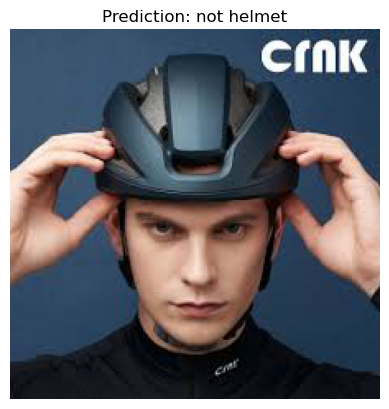

In [171]:
# 예측 결과 시각화
# 0.3일때만 정확히 측정됨 현재
display_prediction(img_path, prediction)

In [172]:
test_loss, test_accuracy = model.evaluate(train_generator)
print(f'Test accuracy: {test_accuracy}')

38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 272ms/step - accuracy: 0.8372 - loss: 0.4110
Test accuracy: 0.8110964298248291


In [173]:
y_scores = model.predict(train_generator)

38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 296ms/step


In [112]:
from sklearn.metrics import precision_recall_curve

y_true = train_generator.classes  # 실제 레이블
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

In [113]:
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"최적의 임계값: {best_threshold}")

최적의 임계값: 0.036516591906547546


In [132]:
model.save('my_helmet_model.keras')